In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 

In [2]:
import pandas as pd
import os

# Path to extracted MovieLens dataset
DATA_DIR = './data/ml-25m'

# Optimized dtypes
rating_dtypes = {
    'userId': 'int32',
    'movieId': 'int32',
    'rating': 'float32',
    'timestamp': 'int32'
}
movie_dtypes = {
    'movieId': 'int32',
    'title': 'string',
    'genres': 'string'
}
tag_dtypes = {
    'userId': 'int32',
    'movieId': 'int32',
    'tag': 'string',
    'timestamp': 'int32'
}
link_dtypes = {
    'movieId': 'int32',
    'imdbId': 'float32',
    'tmdbId': 'float32'
}


def load_csv(filename, dtypes):
    path = os.path.join(DATA_DIR, filename)
    print(f"Loading {filename} ...")
    df = pd.read_csv(path, dtype=dtypes)
    print(f"Loaded {filename}: shape={df.shape}")
    return df

ratings = load_csv('ratings.csv', rating_dtypes)
movies  = load_csv('movies.csv', movie_dtypes)
tags    = load_csv('tags.csv', tag_dtypes)
links   = load_csv('links.csv', link_dtypes)
# genome_tags = load_csv('genome-tags.csv')
# genome_scores = pd.read_csv('./data/ml-25m/genome-scores.csv-scores.csv')


Loading ratings.csv ...
Loaded ratings.csv: shape=(25000095, 4)
Loading movies.csv ...
Loaded movies.csv: shape=(62423, 3)
Loading tags.csv ...
Loaded tags.csv: shape=(1093360, 4)
Loading links.csv ...
Loaded links.csv: shape=(62423, 3)


In [3]:
 for df in[movies,ratings,tags,links]:
     display(df.head())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


,movieId,imdbId,tmdbId
0,1,114709.0,862.0
1,2,113497.0,8844.0
2,3,113228.0,15602.0
3,4,114885.0,31357.0
4,5,113041.0,11862.0


In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 381.5 MB


In [10]:
movies.value_counts()

movieId  title                                                           genres                                     
1        Toy Story (1995)                                                Adventure|Animation|Children|Comedy|Fantasy    1
162130   The Perfect Crime (1978)                                        Crime                                          1
162070   3 Days of Normal (2012)                                         Children|Comedy|Romance                        1
162072   Bubblegum and Broken Fingers (2011)                             Crime|Drama|Western                            1
162074   The Yin and the Yang of Mr. Go (1970)                           Mystery|Thriller                               1
                                                                                                                       ..
107614   White Reindeer (2013)                                           Comedy|Drama                                   1
107623   2013 Rock and Roll H

In [22]:
# data = pd.merge(pd.merge(ratings,movies),tags)
# display(data)

,userId,movieId,rating,timestamp,title,genres,tag
0,653,69844,4.0,1489952041,Harry Potter and the Half-Blood Prince (2009),Adventure|Fantasy|Mystery|Romance|IMAX,own
1,1490,235,3.5,1257187632,Ed Wood (1994),Comedy|Drama,true story
2,3150,99117,3.5,1360079516,This Is 40 (2012),Drama,dialogue
3,3150,102123,3.5,1379917700,This Is the End (2013),Action|Comedy,apocalypse
4,3448,2011,3.5,1517047136,Back to the Future Part II (1989),Adventure|Comedy|Sci-Fi,time travel
...,...,...,...,...,...,...,...
173,156433,1464,4.0,1474565631,Lost Highway (1997),Crime|Drama|Fantasy|Film-Noir|Mystery|Romance,mystery
174,159557,915,5.0,1549802983,Sabrina (1954),Comedy|Romance,romance
175,160473,143859,3.5,1475149592,"Hail, Caesar! (2016)",Comedy,Coen brothers
176,160972,3698,3.5,1365984227,"Running Man, The (1987)",Action|Sci-Fi,Arnold Schwarzenegger


In [5]:

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 381.5 MB


In [35]:
data = pd.merge(ratings,movies)

In [36]:
display(data)

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance
...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX


In [37]:
data.iloc[0]

userId                                 1
movieId                              296
rating                               5.0
timestamp                     1147880044
title                Pulp Fiction (1994)
genres       Comedy|Crime|Drama|Thriller
Name: 0, dtype: object

In [38]:
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')
display(data)

,userId,movieId,rating,timestamp,title,genres,datetime
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2006-05-17 15:34:04
1,1,306,3.5,1147868817,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,2006-05-17 12:26:57
2,1,307,5.0,1147868828,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,2006-05-17 12:27:08
3,1,665,5.0,1147878820,Underground (1995),Comedy|Drama|War,2006-05-17 15:13:40
4,1,899,3.5,1147868510,Singin' in the Rain (1952),Comedy|Musical|Romance,2006-05-17 12:21:50
...,...,...,...,...,...,...,...
25000090,162541,50872,4.5,1240953372,Ratatouille (2007),Animation|Children|Drama,2009-04-28 21:16:12
25000091,162541,55768,2.5,1240951998,Bee Movie (2007),Animation|Comedy,2009-04-28 20:53:18
25000092,162541,56176,2.0,1240950697,Alvin and the Chipmunks (2007),Children|Comedy,2009-04-28 20:31:37
25000093,162541,58559,4.0,1240953434,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2009-04-28 21:17:14


In [39]:
# Extract features
data['rating_year'] = data['datetime'].dt.year
data['rating_month'] = data['datetime'].dt.month
data['rating_day'] = data['datetime'].dt.day
data['day_of_week'] = data['datetime'].dt.dayofweek # Monday=0, Sunday=6
data['rating_hour'] = data['datetime'].dt.hour

In [64]:
data['release_year'] = data['title'].str.extract(r'\((?P<year>\d{4})\)$', expand=False).astype(float)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NAType'

In [40]:
data['clean_title'] = data['title'].str.replace(r'\(\d{4}\)', '', regex=True).str.strip()

In [41]:
data.drop('timestamp', axis=1, inplace=True)

In [65]:
display(data)

,userId,movieId,rating,title,genres,datetime,rating_year,rating_month,rating_day,day_of_week,rating_hour,clean_title,release_year
0,1,296,5.0,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2006-05-17 15:34:04,2006,5,17,2,15,Pulp Fiction,1994.0
1,1,306,3.5,Three Colors: Red (Trois couleurs: Rouge) (1994),Drama,2006-05-17 12:26:57,2006,5,17,2,12,Three Colors: Red (Trois couleurs: Rouge),1994.0
2,1,307,5.0,Three Colors: Blue (Trois couleurs: Bleu) (1993),Drama,2006-05-17 12:27:08,2006,5,17,2,12,Three Colors: Blue (Trois couleurs: Bleu),1993.0
3,1,665,5.0,Underground (1995),Comedy|Drama|War,2006-05-17 15:13:40,2006,5,17,2,15,Underground,1995.0
4,1,899,3.5,Singin' in the Rain (1952),Comedy|Musical|Romance,2006-05-17 12:21:50,2006,5,17,2,12,Singin' in the Rain,1952.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25000090,162541,50872,4.5,Ratatouille (2007),Animation|Children|Drama,2009-04-28 21:16:12,2009,4,28,1,21,Ratatouille,2007.0
25000091,162541,55768,2.5,Bee Movie (2007),Animation|Comedy,2009-04-28 20:53:18,2009,4,28,1,20,Bee Movie,2007.0
25000092,162541,56176,2.0,Alvin and the Chipmunks (2007),Children|Comedy,2009-04-28 20:31:37,2009,4,28,1,20,Alvin and the Chipmunks,2007.0
25000093,162541,58559,4.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,2009-04-28 21:17:14,2009,4,28,1,21,"Dark Knight, The",2008.0


In [ ]:
## ------------------------EDA-----------------


--- 2. Univariate Analysis ---


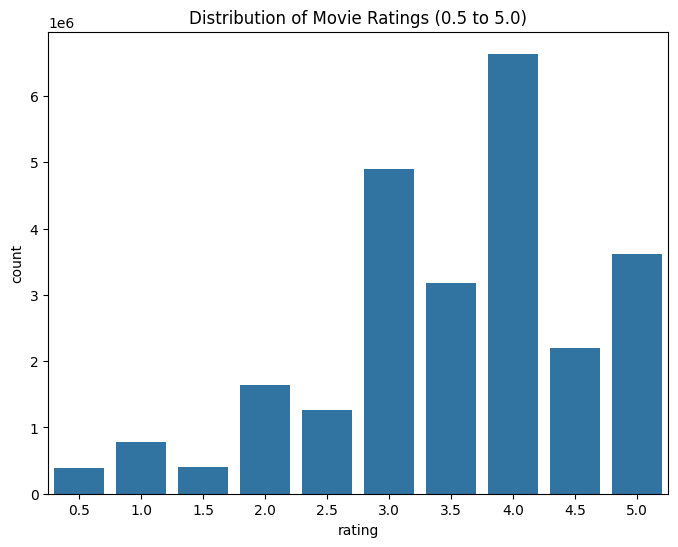

In [44]:
# --- Step 2: Univariate Analysis (Core Distributions) ---
print("\n--- 2. Univariate Analysis ---")

# 2.1 Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=data)
plt.title('Distribution of Movie Ratings (0.5 to 5.0)')
plt.show()


Total Unique Users: 162,541
Mean Ratings per User: 153.81
Top 5 Most Active Users:
userId
72315     32202
80974      9178
137293     8913
33844      7919
20055      7488
Name: rating, dtype: int64


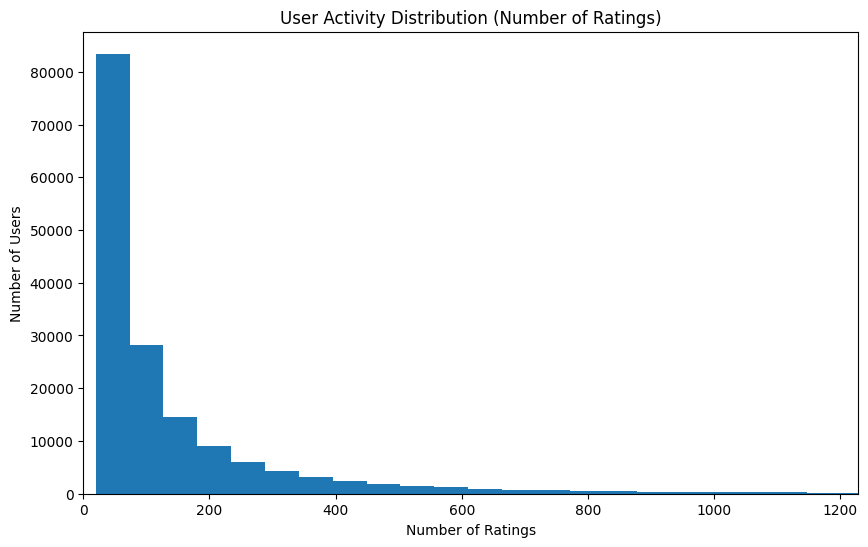

In [58]:

# 2.2 User Activity (How many ratings per user)
user_counts = data.groupby('userId')['rating'].count()
print(f"Total Unique Users: {data['userId'].nunique():,}")
print(f"Mean Ratings per User: {user_counts.mean():.2f}")
print(f"Top 5 Most Active Users:\n{user_counts.nlargest(5)}")

plt.figure(figsize=(10, 6))
user_counts.plot(kind='hist', bins=600, title='User Activity Distribution (Number of Ratings)')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.xlim(0, user_counts.quantile(0.99)) # Limiting x-axis for better visibility (due to power users)
plt.show()



Total Unique Movies: 59,047
Mean Ratings per Movie: 423.39
Top 5 Most Popular Movies:
movieId
356     81491
318     81482
296     79672
593     74127
2571    72674
Name: rating, dtype: int64


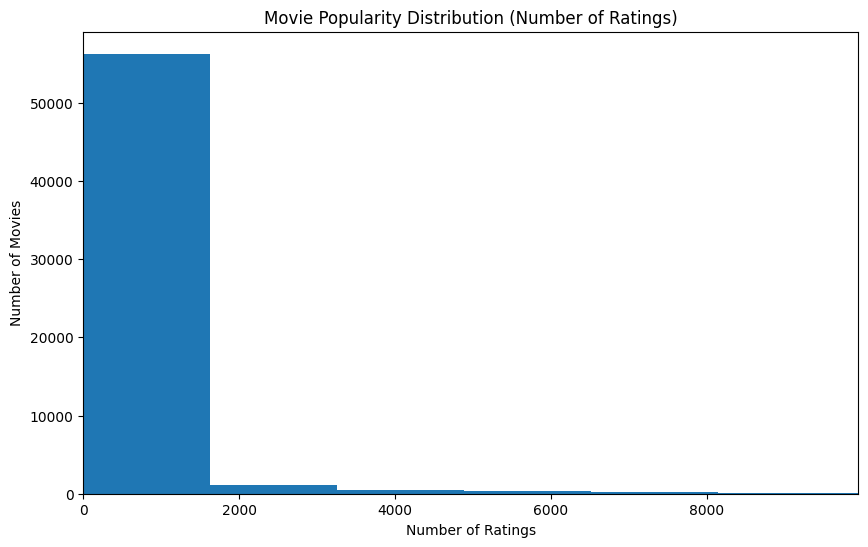

In [54]:

# 2.3 Movie Popularity (How many ratings per movie)
movie_counts = data.groupby('movieId')['rating'].count()
print(f"\nTotal Unique Movies: {data['movieId'].nunique():,}")
print(f"Mean Ratings per Movie: {movie_counts.mean():.2f}")
print(f"Top 5 Most Popular Movies:\n{movie_counts.nlargest(5)}")

plt.figure(figsize=(10, 6))
movie_counts.plot(kind='hist', bins=50, title='Movie Popularity Distribution (Number of Ratings)')
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.xlim(0, movie_counts.quantile(0.99)) # Limiting x-axis for better visibility (due to few blockbusters)
plt.show()
print(" \n")


In [ ]:

# --- Step 3: Content-Based Feature Analysis (Genres) ---
print("--- 3. Content-Based Feature Analysis (Genres) ---")

# 3.1 Explode Genres (One row per movie and genre)
# This is a key step for Content-Based feature extraction
genre_df = data[['movieId', 'genres']].drop_duplicates().copy()
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_exploded_df = genre_df.explode('genres')

# 3.2 Genre Counts and Distribution
genre_counts = genre_exploded_df['genres'].value_counts()
print(f"Total Unique Genres: {len(genre_counts)}")
print(f"Top 5 Most Frequent Genres:\n{genre_counts.nlargest(5)}")

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Total Movie Count per Genre (Exploded)')
plt.xticks(rotation=45, ha='right')
plt.show()

# 3.3 Average Rating by Genre
# Need to use the original data for accurate rating calculation
# Merging the exploded genres back with the full rating data for this calculation
merged_for_genre_rating = pd.merge(data[['userId', 'movieId', 'rating']], genre_exploded_df, on='movieId', how='left')

avg_rating_by_genre = merged_for_genre_rating.groupby('genres')['rating'].mean().sort_values(ascending=False)
print(f"\nAverage Rating by Genre:\n{avg_rating_by_genre}")




--- 4. Bivariate and Temporal Analysis ---


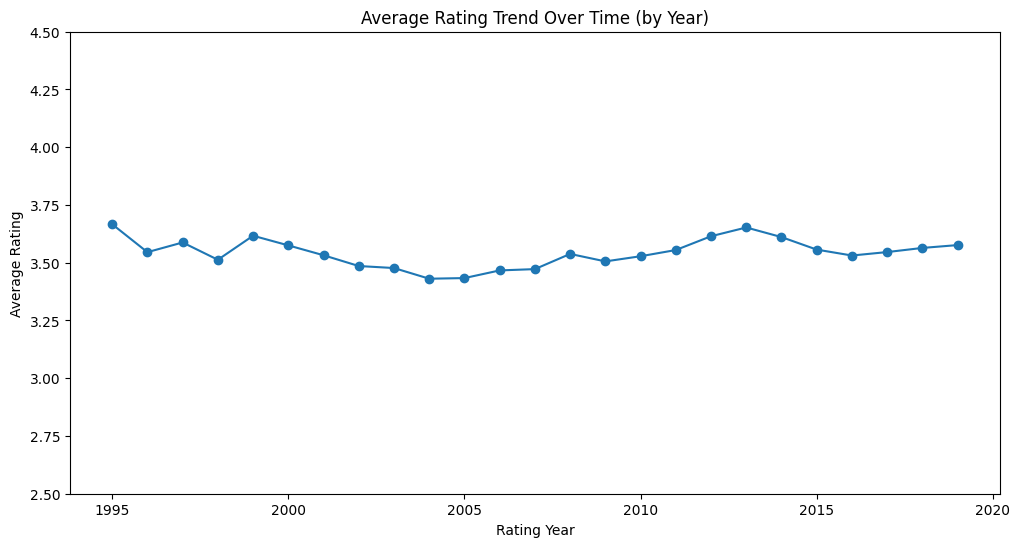

In [59]:

# --- Step 4: Bivariate and Temporal Analysis ---
print("\n--- 4. Bivariate and Temporal Analysis ---")

# 4.1 Average Rating Trend Over Time
# Plotting mean rating by year
avg_rating_by_year = data.groupby('rating_year')['rating'].mean()

plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind='line', marker='o')
plt.title('Average Rating Trend Over Time (by Year)')
plt.xlabel("Rating Year")
plt.ylabel("Average Rating")
plt.ylim(2.5, 4.5) # Set limits to highlight small variations
plt.show()



Number of movies with > 1000 ratings: 3,794


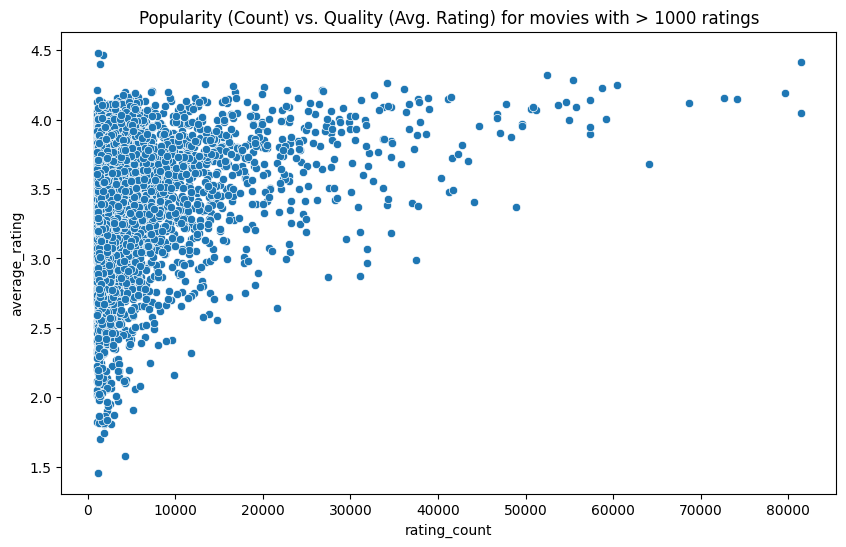

In [60]:

# 4.2 Popularity vs. Quality (Using a threshold to filter out low-rated movies)
# Create a summary of movie statistics
movie_stats = data.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
)

# Apply a minimum rating count threshold (e.g., must have > 1000 ratings to be considered "popular")
min_ratings_threshold = 1000 
popular_movies = movie_stats[movie_stats['rating_count'] >= min_ratings_threshold]

print(f"\nNumber of movies with > {min_ratings_threshold} ratings: {len(popular_movies):,}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating_count', y='average_rating', data=popular_movies)
plt.title(f'Popularity (Count) vs. Quality (Avg. Rating) for movies with > {min_ratings_threshold} ratings')
plt.show()
print(" \n")


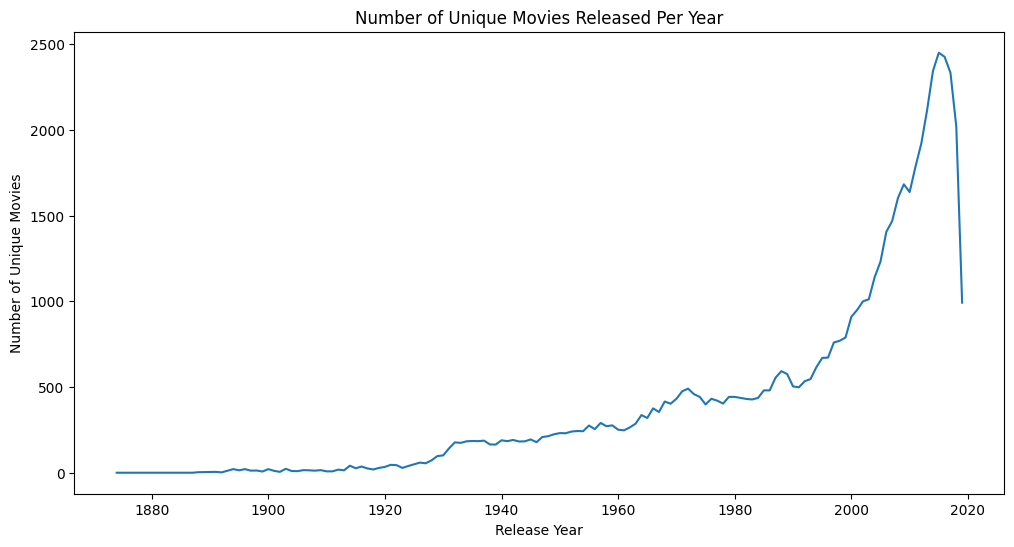

In [66]:

# 4.3 Movie Release Year Trend
movies_per_release_year = data.drop_duplicates(subset=['movieId']).groupby('release_year').size()

plt.figure(figsize=(12, 6))
movies_per_release_year.plot(kind='line', title='Number of Unique Movies Released Per Year')
plt.xlabel("Release Year")
plt.ylabel("Number of Unique Movies")
plt.show()


In [ ]:

# # --- Step 5: Tags Analysis (The Sparse Feature) ---
# # NOTE: The tags_df is separate, so the change to 'data' doesn't affect the initial load.
# print("\n--- 5. Tags Analysis ---")
# print(f"Total unique tags in tags.csv: {tags_df['tag'].nunique():,}")
# print(f"Total movies with tags in tags.csv: {tags_df['movieId'].nunique():,}")

# # Top 10 most frequent tags
# top_tags = tags_df['tag'].value_counts().nlargest(10)
# print(f"\nTop 10 Most Frequent Tags:\n{top_tags}")

# # For more advanced analysis, you would calculate average rating per tag
# # Merging tags_df with the original ratings_df (which is preserved from Step 0)
# tagged_ratings = pd.merge(tags_df, ratings_df, on=['userId', 'movieId'], how='inner')
# avg_rating_by_tag = tagged_ratings.groupby('tag')['rating'].agg(['mean', 'count'])
# avg_rating_by_tag_filtered = avg_rating_by_tag[avg_rating_by_tag['count'] >= 500].sort_values('mean', ascending=False)
# print("\nTop 5 Highest Rated Tags (min 500 uses):\n", avg_rating_by_tag_filtered.head())